In [2]:
import pandas as pd
df=pd.read_csv('d:/data/heart/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.shape

(303, 14)

In [3]:
df['target'].value_counts() #0,1 카운트

1    165
0    138
Name: target, dtype: int64

In [6]:
train_cols=df.columns[0:13]
X=df[train_cols] #독립변수
y=df['target'] #종속변수

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D541E2FE08>,
      dtype=object)

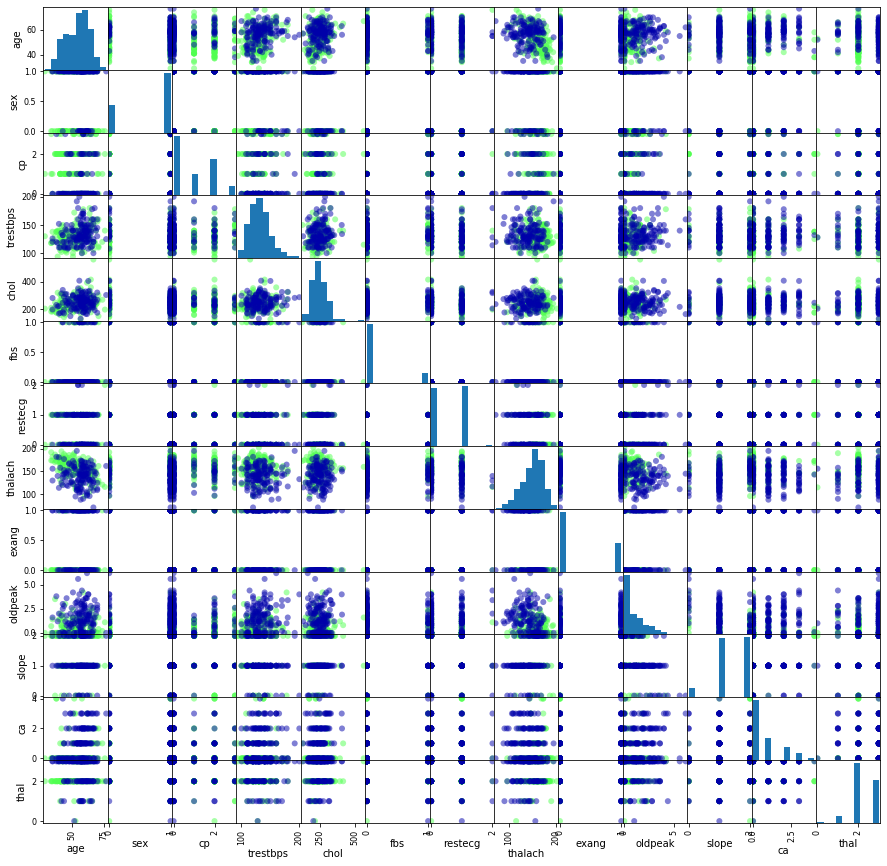

In [8]:
#산점도 행렬
%matplotlib inline
import mglearn
pd.plotting.scatter_matrix(X,c=y,figsize=(15,15),marker='o',
                          cmap=mglearn.cm3)

In [9]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['target'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [10]:
df2['target'].value_counts() #0 악성 138, 양성 138

1    138
0    138
Name: target, dtype: int64

In [19]:
#샘플링 데이터셋에서 독립변수와 종속변수 구분
X=X_samp[train_cols]
y=y_samp['target']

In [20]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=10)

In [21]:
# 0~1로 정규화
mean_on_train=X_train.mean(axis=0) #변수들의 평균값
std_on_train=X_train.std(axis=0) #변수들의 표준편차값
#각 변량에서 평균을 빼고 표준편차로 나누어 
#평균 0, 표준편차1인 데이터로
X_train_scaled=(X_train - mean_on_train)/std_on_train
X_test_scaled=(X_test - mean_on_train)/std_on_train

In [22]:
print(X_train.head()) #정규화 이전의 데이터
print(X_train_scaled.head()) #정규화 이후의 데이터

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
20    44    1   0       112   290    0        0      153      0      0.0   
38    68    1   2       180   274    1        0      150      1      1.6   
26    58    1   0       128   216    0        0      131      1      2.2   
264   41    1   2       130   214    0        0      168      0      2.0   
59    54    1   0       110   239    0        1      126      1      2.8   

     slope  ca  thal  
20       2   1     2  
38       1   0     3  
26       1   3     3  
264      1   0     2  
59       1   1     3  
          age       sex        cp  trestbps      chol       fbs   restecg  \
20  -1.215862  0.681576 -0.853555 -1.129442  0.757906 -0.433969 -0.966685   
38   1.454583  0.681576  1.072416  2.721163  0.454295  2.293837 -0.966685   
26   0.341898  0.681576 -0.853555 -0.223418 -0.646294 -0.433969 -0.966685   
264 -1.549667  0.681576  1.072416 -0.110164 -0.684246 -0.433969 -0.966685   
59  -0.103176  0.681

In [24]:
print(X_train_scaled.describe())
print(X_test_scaled.describe())

                age           sex            cp      trestbps          chol  \
count  2.200000e+02  2.200000e+02  2.200000e+02  2.200000e+02  2.200000e+02   
mean  -2.715000e-16  2.735186e-16  6.459479e-17  3.926152e-16 -5.046468e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -2.328547e+00 -1.460519e+00 -8.535553e-01 -2.148720e+00 -2.354106e+00   
25%   -7.707876e-01 -1.460519e+00 -8.535553e-01 -6.764299e-01 -7.221971e-01   
50%    1.193608e-01  6.815757e-01 -8.535553e-01 -1.101644e-01 -9.599969e-02   
75%    7.035207e-01  6.815757e-01  1.072416e+00  4.561012e-01  5.491734e-01   
max    2.456000e+00  6.815757e-01  2.035401e+00  3.853694e+00  5.957242e+00   

                fbs       restecg       thalach         exang       oldpeak  \
count  2.200000e+02  2.200000e+02  2.200000e+02  2.200000e+02  2.200000e+02   
mean  -3.532528e-18 -1.059758e-16 -2.649396e-16  6.055762e-17 -3.936245e-16   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.

[0.7857142857142857, 0.8035714285714286, 0.8392857142857143, 0.8571428571428571, 0.875, 0.8392857142857143, 0.8571428571428571, 0.8571428571428571, 0.875, 0.8571428571428571]
최대값: 0.875
(array([4, 8], dtype=int64),)
최적의 k: 5 0.875


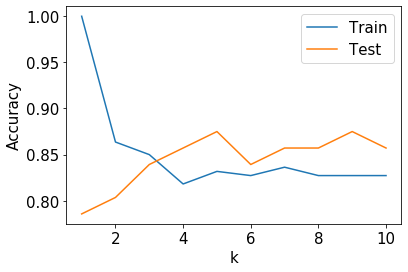

In [29]:
#최적 이웃의 갯수(k)를 구하는 과정
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11)
for n in neighbors: 
    knn=KNeighborsClassifier(n_neighbors=n) #knn 모형
    knn.fit(X_train_scaled,y_train) #기계학습
    # 학습용, 검증용 정확도 점수를 리스트에 추가
    train_rate.append(knn.score(X_train_scaled,y_train))
    test_rate.append(knn.score(X_test_scaled,y_test))
    
plt.rcParams['font.size']=15 #그래프의 사이즈 설정
plt.plot(neighbors,train_rate,label='Train') #학습용 정확도 그래프
plt.plot(neighbors,test_rate,label='Test') #검증용 정확도 그래프
plt.ylabel('Accuracy') #x축의 라벨
plt.xlabel('k') #y축의 라벨
plt.legend() #범례표시



print(test_rate)
max_rate=max(test_rate) #검증용 정확도 최대값
print('최대값:',max_rate)
print(np.where(test_rate == max_rate))
idx=np.where(test_rate == max_rate)[0][0] #최대값의 인덱스 위치
print('최적의 k:',idx+1, test_rate[idx])

In [30]:
#실험을 통해 얻은 최적의 k값으로 만든 모형
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
#모형의 예측 정확도
print('학습용:{:7.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:7.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용:  83.18%
검증용:  87.50%


In [34]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['정상','심장병'],
                  columns=['정상','심장병'])
df_cm

,정상,심장병
정상,22,4
심장병,3,27
